* **I : Exploration**

In [53]:
Data <- read.csv(file.path("..","data","training_data.csv")) # load the data
Data <- na.omit(Data) # suppress all NAs values
dim(Data)
head(Data)

[1]  708 4872

,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<fct>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


* Look at boxplot of pleansantness vs Intensity

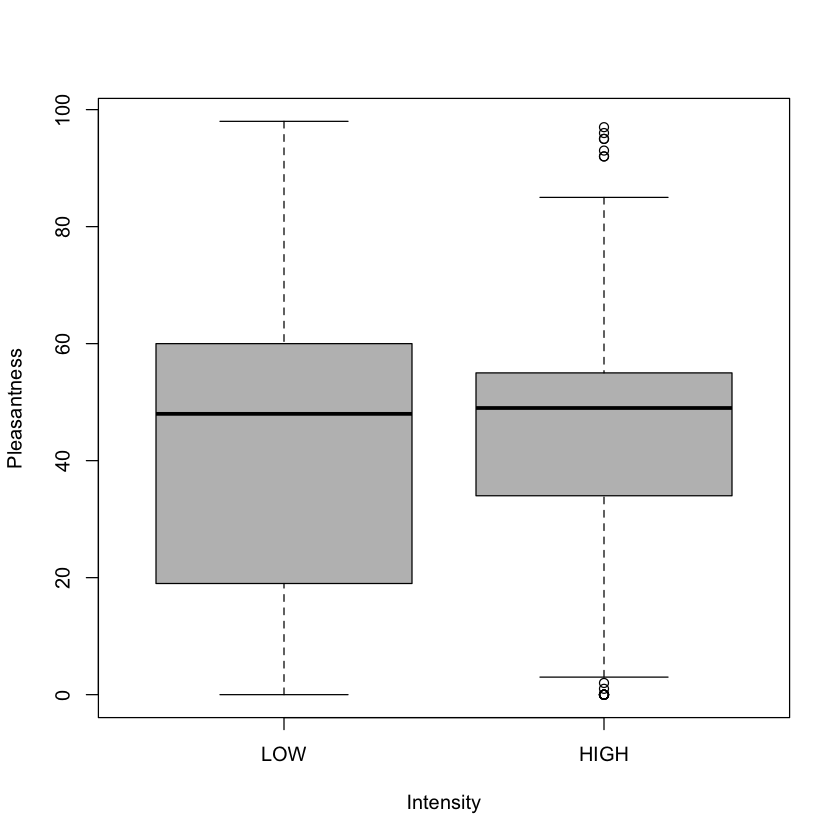

In [55]:
plot(Data$Intensity, Data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("LOW","HIGH"))


*INTERPRETATION* : 

We can see that the samples with high intensity are not considered very pleasant (pleasantness between 30 to 50). The samples that have a low intensity have a bigger range of pleasantness (20 to 60). Moreover, the mean pleasantness between intense and not intense smell is nearly the same (around 48). 

Change the Low, high Intensity value to binary value (low=0 and high =1)

In [56]:
lookup <- c("low" = 1, "high" = 0)
Data$Intensity <- lookup[Data$Intensity]
head(Data)


,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,1,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,1,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,1,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,0,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,1,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


* let's look at somes data

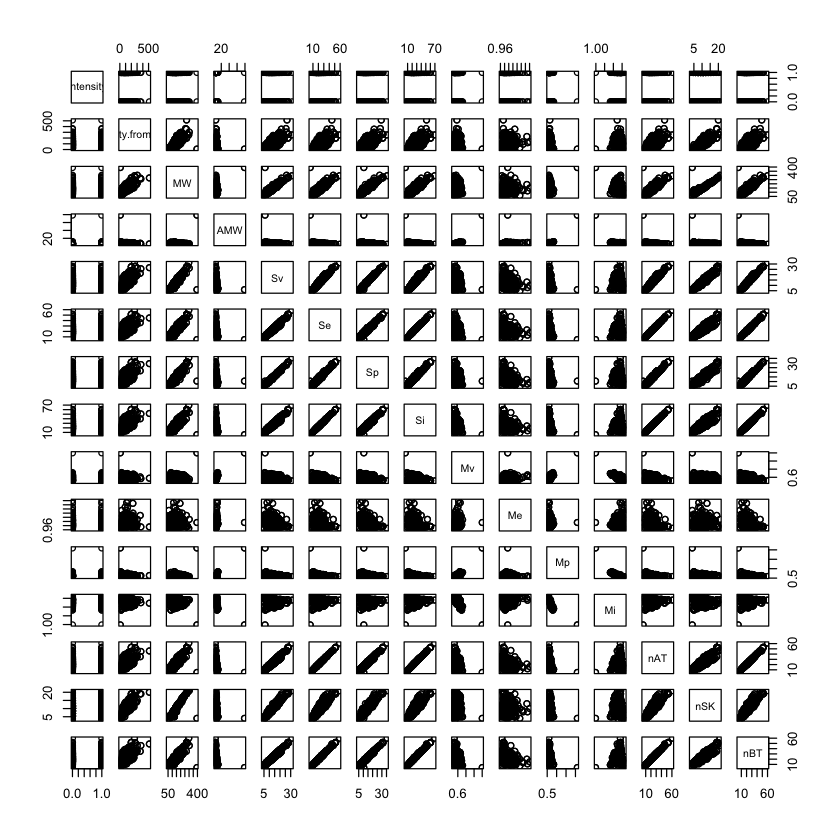

In [57]:
Data.x<-Data[, c(-2, -3)]
pairs(Data.x[, (1:15)] )

--> we can see some linear interaction bewteem SV, Se, Sp and Si, MW , nAT, nSK, nBTand Complexity from pubmed

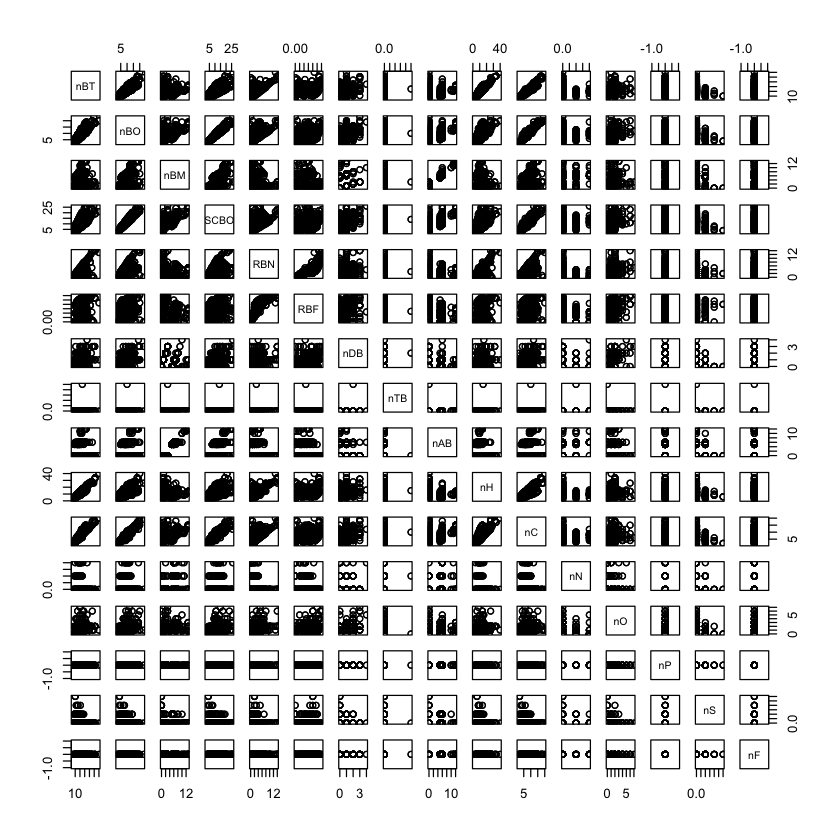

In [58]:
pairs(Data.x[, 15:30])

--> we can see some linear interaction bewteem nBT, nBO, SCBC, nH, nC. 

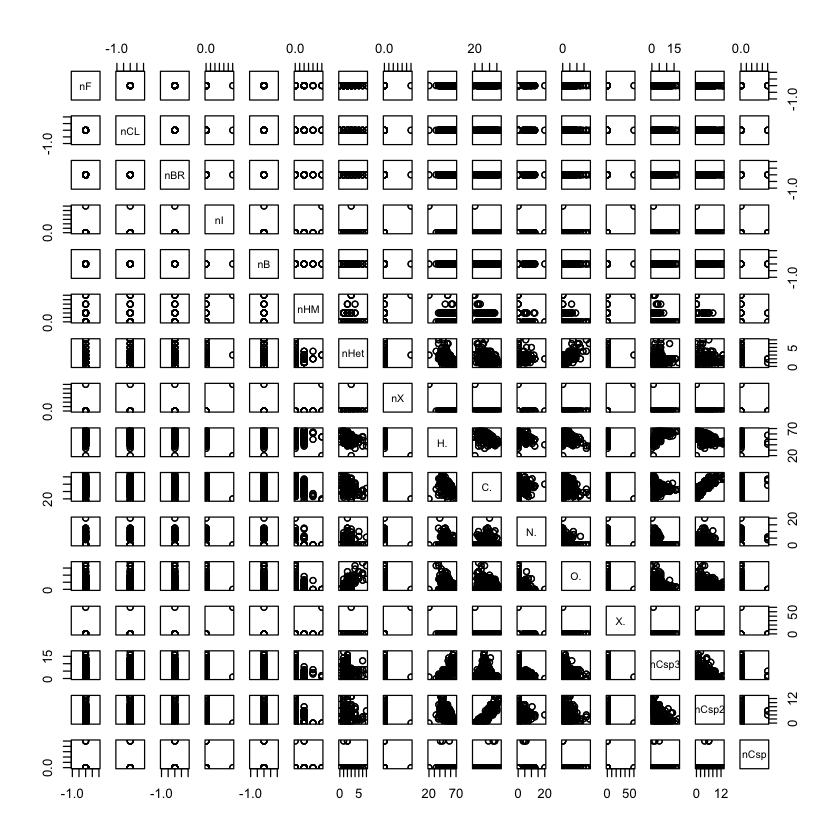

In [6]:
pairs(Data.x[, 30:45])

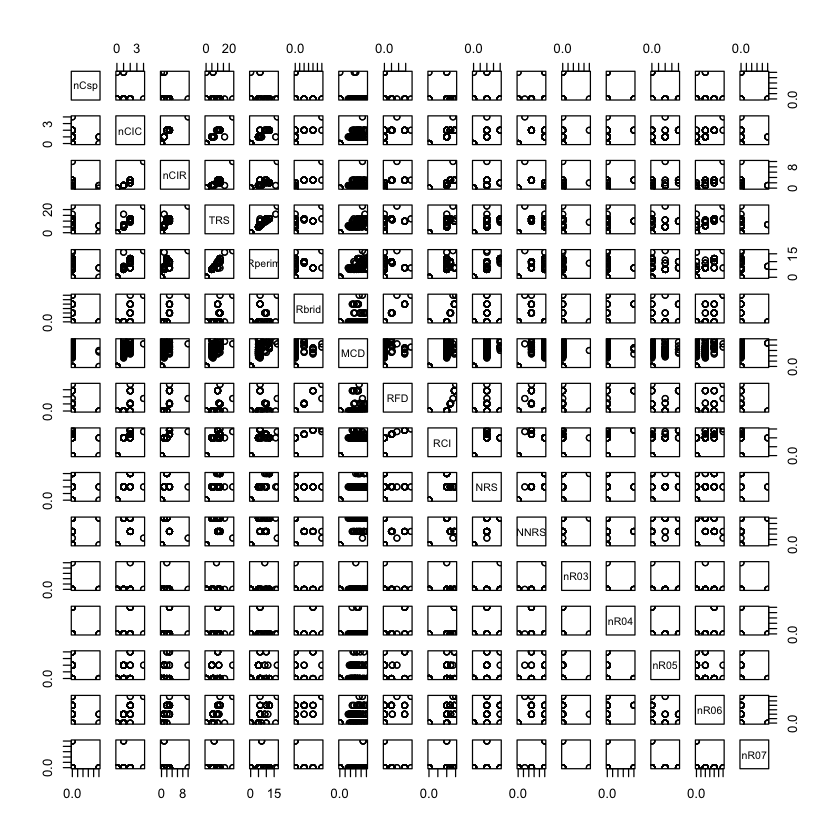

In [59]:
pairs(Data.x[, 45:60])

The visualization of 60 predictors of our data shows that we do not seem to have a lot of linear relashionships between the predictors. 
Lets clean our data in order to reduce the number of predictors.

Statistical analysis of the data : we supress the predictors with a null variance (do not have any effect on pleasantness)  and the correlated columns. 
We perform normalization of our data. 


In [102]:
library(caret)


data <- Data[, which(apply(Data, 2, var)!=0)] # supress columns with var == 0 

cormat<- cor(data[, -2]) 
highly_corr <- findCorrelation(cormat, 0.9) # find correlated columns 
data <- data[,-c(highly_corr)] # suppress correlated columns 

data_final<-data[, -3] # supress the SWEETORSOUR pedictor 
data_final<-as.data.frame(scale(data_final)) # normalization 

dim(data_final)
head(data_final)



[1] 708 852

,Intensity,VALENCE.PLEASANTNESS,RBN,RBF,nHM,N.,nCIC,MCD,NRS,nR03,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.9992935,0.06138675,0.2387692,-0.2621597,-0.3339178,-0.3758712,2.0184478,0.3933749,0.7423408,-0.05318703,⋯,-0.210203,-0.07532458,4.1960309,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
2,0.9992935,0.23351276,-0.8004638,-0.9580438,-0.3339178,-0.3758712,0.5267348,0.9986065,0.7423408,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
3,0.9992935,0.53473329,0.5851802,0.2297583,-0.3339178,-0.3758712,2.0184478,0.9986065,2.5179396,-0.05318703,⋯,4.750587,-0.07532458,4.1960309,-0.05318703,2.1071008,7.6103928,2.5539556,-0.07532458,1.478546,10.80901225
4,0.9992935,-1.57381039,-0.8004638,-0.6700918,-0.3339178,-0.3758712,-0.9649782,-1.0198409,-1.0332581,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
5,-0.9992935,0.31957577,-0.4540528,-0.5021197,-0.3339178,-0.3758712,0.5267348,0.7958539,0.7423408,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
6,0.9992935,-0.97136934,0.9315911,0.8056624,-0.3339178,-0.3758712,0.5267348,0.2783809,0.7423408,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472


we can observe that predictor with linear correlation (MW, SV, Se, Sp, ...) that we detected in the plot above have been remove.

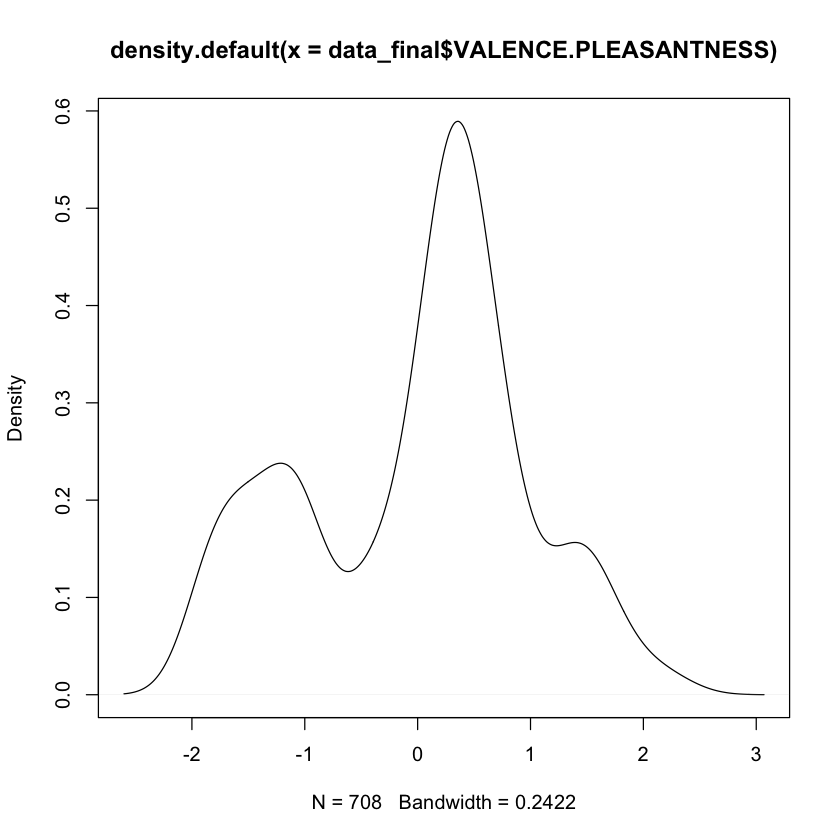

In [62]:
plot(density(data_final$VALENCE.PLEASANTNESS))


--> pleasantness does not have a Gaussian curve shape. It may be difficult to find a linear regression relashionship. 

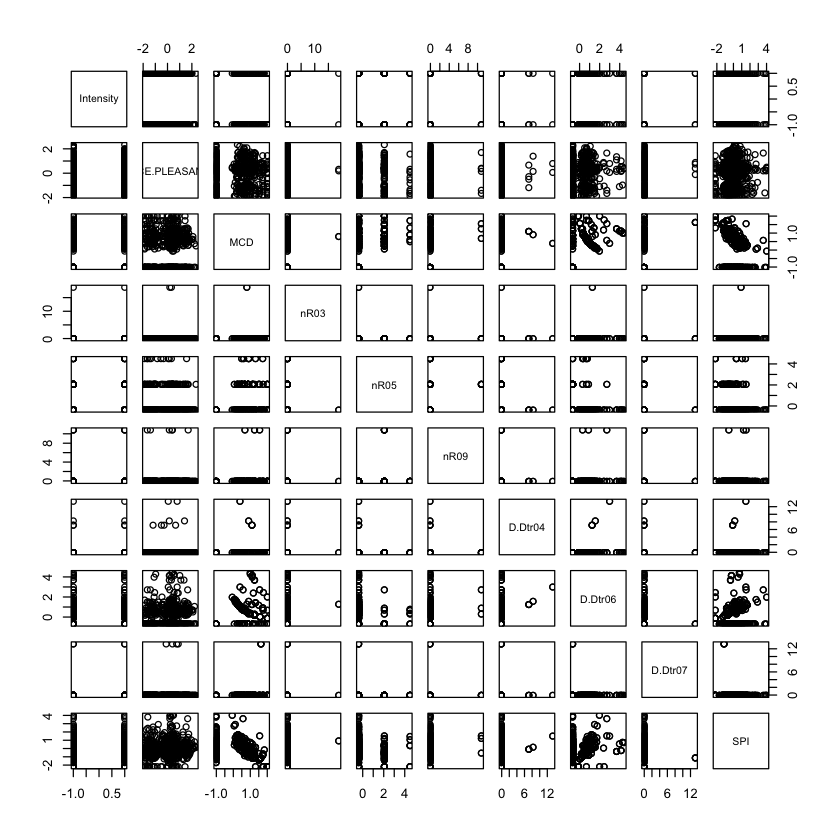

In [63]:
pairs(data_final[, 1:10])

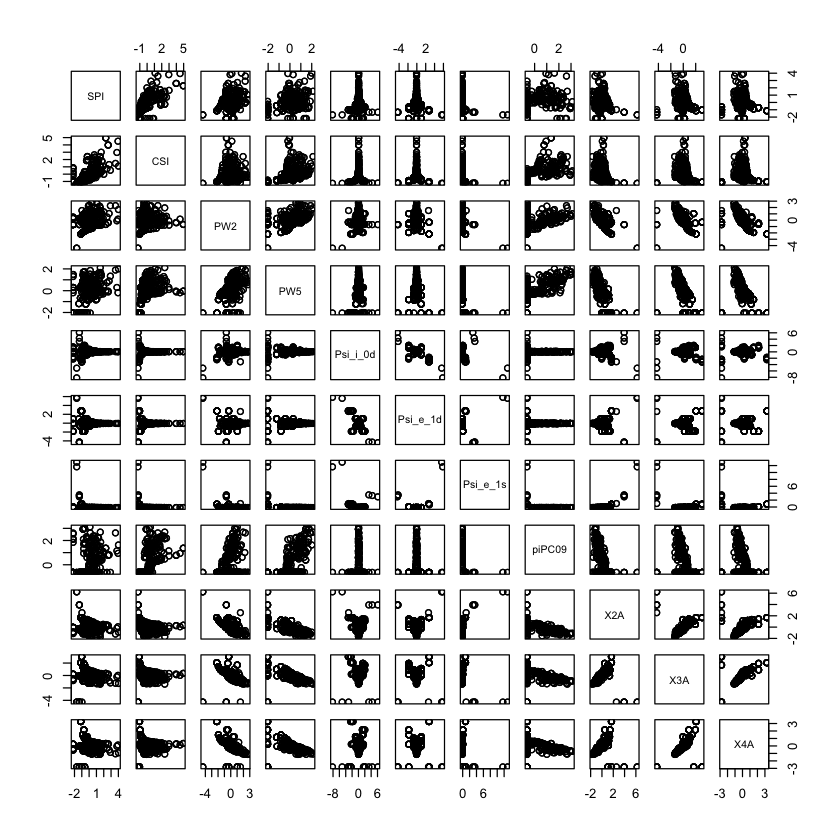

In [64]:
pairs(data_final[, 10:20])

* **II : LINEAR METHODE**

* divide the data between a training and a test set 

In [103]:
#creation train/test set

set.seed(1)

data.x<-(data_final[, -2])

data.y<-(data_final$VALENCE.PLEASANTNESS)
data<-cbind(pleasantness=data.y, data.x)

idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)
X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) ==0 # identify col with 0 variance 
data.train.x <- data.frame(X.train[, !idx.zero.var]) # supress the predictors with var == 0 
#cormat<- cor(data.train.x) 
#highly_corr <- findCorrelation(cormat, 0.75) # find correlated columns 
#data.train.x <- data.train.x[,-c(highly_corr)] 

data.train.y<-data.y[idx.train]
data.train<-cbind(pleasantness=data.train.y, data.train.x)


X.test<- data.x[-idx.train, ]
data.test.x <- data.frame(X.test[, !idx.zero.var])  # supress the predictors with var == 0 in the train set 
#data.test.x<-data.test.x[, -c(highly_corr)]

data.test.y<-data.y[-idx.train]
data.test<-(cbind(pleasantness=data.test.y, data.test.x))


head(data.train)
head(data.test)

dim(data.train)

dim(data.test)

,pleasantness,Intensity,RBN,RBF,nHM,N.,nCIC,MCD,NRS,nR03,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
679,0.23351276,-0.9992935,1.9708241,1.6815165,-0.3339178,-0.3758712,-0.9649782,-1.0198409,-1.0332581,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
129,0.40563878,-0.9992935,0.5851802,1.0096284,-0.3339178,-0.3758712,-0.9649782,-1.0198409,-1.0332581,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
509,0.01835525,-0.9992935,-0.4540528,-0.5501117,-0.3339178,-0.3758712,0.5267348,0.6294152,0.7423408,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
471,-0.02467626,-0.9992935,-0.8004638,-0.8860558,-0.3339178,-0.3758712,0.5267348,0.9986065,0.7423408,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
299,0.14744976,0.9992935,-0.8004638,-0.9580438,-0.3339178,1.5546229,0.5267348,0.7958539,0.7423408,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
270,0.79292231,0.9992935,-0.8004638,-0.9940378,-0.3339178,-0.3758712,0.5267348,0.7958539,0.7423408,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472


,pleasantness,Intensity,RBN,RBF,nHM,N.,nCIC,MCD,NRS,nR03,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,-1.5738104,0.9992935,-0.8004638,-0.6700918,-0.3339178,-0.3758712,-0.9649782,-1.01984092,-1.0332581,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
5,0.3195758,-0.9992935,-0.4540528,-0.5021197,-0.3339178,-0.3758712,0.5267348,0.79585393,0.7423408,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
6,-0.9713693,0.9992935,0.9315911,0.8056624,-0.3339178,-0.3758712,0.5267348,0.27838090,0.7423408,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
7,0.5347333,-0.9992935,-0.4540528,-0.5981038,-0.3339178,-0.3758712,2.0184478,1.77330299,2.5179396,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
8,0.3626073,-0.9992935,0.5851802,0.8056624,-0.3339178,-0.3758712,-0.9649782,-1.01984092,-1.0332581,-0.05318703,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
9,0.4056388,-0.9992935,0.2387692,-0.2261657,-0.3339178,1.7003206,0.5267348,-0.06357497,0.7423408,-0.05318703,⋯,4.750587,-0.07532458,4.1960309,-0.05318703,2.1071008,7.6103928,2.5539556,13.25712685,1.478546,10.80901225


[1] 354 838

[1] 354 838

Run subset selection with foward regression method in order to reduce the number of predictors to perform multilinear regression 

In [ ]:
library(leaps)
regfit.fwd <- regsubsets(pleasantness~ ., data.train, really.big=T )
regfit.fwd.summary <- summary(regfit.fwd)

# plot
plot(regfit.fwd.summary$adjr2, type = "l", xlim = c(1,30),
     xlab = "Number of Variables", ylab = "adjusted R^2")
adjr2.max <- which.max(regfit.fwd.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“588  linear dependencies found”


The value of the adjuste R-squared is too low, we choose not to use the outcome of this regression. 

 Lets try to run multilinear regression with all predictors (the 403 predictors) : 

In [104]:
fit1<-lm((pleasantness)~. , data.train)
summary(fit1)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data[, 1]- predict(fit, data))^2)
    TSS <- sum((data[, 1]- mean(data[, 1]))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}





Call:
lm(formula = (pleasantness) ~ ., data = data.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27078 -0.04168  0.00000  0.04168  1.27078 

Coefficients: (588 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)    -9.022e+00  1.422e+01  -0.635   0.5271  
Intensity      -4.171e-02  6.022e-02  -0.693   0.4901  
RBN            -2.133e+01  8.198e+01  -0.260   0.7953  
RBF            -4.737e+01  1.529e+02  -0.310   0.7573  
nHM             1.545e+02  2.817e+02   0.549   0.5844  
N.              3.017e+01  3.636e+01   0.830   0.4086  
nCIC            2.890e+02  9.640e+02   0.300   0.7650  
MCD             7.507e+01  1.328e+02   0.565   0.5731  
NRS            -1.190e+02  1.663e+02  -0.715   0.4759  
nR03            3.271e+00  7.950e+00   0.411   0.6816  
nR05            4.389e+01  7.139e+01   0.615   0.5401  
nR09            8.968e+00  1.061e+01   0.845   0.3999  
nBnz           -1.091e+01  1.743e+01  -0.626   0.53

NA values indicates that some of the variables are not defined because of singularity means that the variables are not linearly independent. 
If we  remove the variables that are giving NA, we  will obtain the same result for the rest of the variables. 
This is because the information given by those variables is already contained in the other variables and thus redundant.

In [124]:
names<-rownames(summary(fit1)$coefficients)


#submodel 1 :

fit2<-lm((pleasantness)~ .-1, (data.train[,c('pleasantness', names[-1])])) #we remove the intercept 
summary(fit2)
quality.of.fit(fit2, data.train)
quality.of.fit(fit2, data.test)



Call:
lm(formula = (pleasantness) ~ . - 1, data = (data.train[, c("pleasantness", 
    names[-1])]))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27464 -0.04860  0.00032  0.04318  1.28039 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
Intensity      -4.086e-02  6.004e-02  -0.681  0.49762   
RBN            -6.030e+01  5.414e+01  -1.114  0.26796   
RBF             4.769e+01  3.041e+01   1.568  0.11987   
nHM            -6.848e+00  1.208e+02  -0.057  0.95489   
N.              3.716e+01  3.455e+01   1.075  0.28467   
nCIC           -1.938e+02  5.904e+02  -0.328  0.74337   
MCD             6.312e+00  7.655e+01   0.082  0.93444   
NRS            -1.468e+01  2.521e+01  -0.582  0.56176   
nR03            5.149e-01  6.639e+00   0.078  0.93833   
nR05           -5.134e-01  1.414e+01  -0.036  0.97111   
nR09            2.310e+00  1.564e+00   1.477  0.14263   
nBnz           -7.691e+00  1.663e+01  -0.462  0.64470   
D.Dtr04        -3.198e-01  1.438e+01  

Residual standard error:  0.830082190666334  R^2 =  0.796960033261572 
Residual standard error:  42.5536676804705  R^2 =  -541.534346321802 


The error is still huge.. let's construc submodel with less perdictor but still revelant for the model 
--> let-s look at predictor with interesting p-value

In [125]:
#names2<-names
d1<-names(which((summary(fit2)$coefficient[, 4]) < 0.1))
d2<-names(which((summary(fit2)$coefficient[, 4]) < 0.05))
d3<-names((which((summary(fit2)$coefficient[, 4]) < 0.01)))
d1
d2
d3

[1] "ZM1Per"        "Psi_i_1d"      "Psi_e_1d"      "piPC09"       
 [5] "IC2"           "H_D.Dt"        "ChiA_D.Dt"     "MATS6m"       
 [9] "GATS8p"        "GATS8i"        "SpMin6_Bh.s."  "P_VSA_LogP_7" 
[13] "SpMax_AEA.dm." "Eig03_EA.dm."  "Eig08_EA.dm."

[1] "IC2"           "H_D.Dt"        "ChiA_D.Dt"     "GATS8i"       
[5] "SpMax_AEA.dm."

[1] "GATS8i"        "SpMax_AEA.dm."

In [128]:
#submodel :

fit3<- lm(pleasantness ~ ZM1Per+ Psi_i_1d+ Psi_e_1d+ piPC09+IC2+H_D.Dt+ChiA_D.Dt+MATS6m+GATS8p+GATS8i+SpMin6_Bh.s.+ P_VSA_LogP_7+SpMax_AEA.dm.+Eig03_EA.dm.+Eig08_EA.dm.-1, data.train)



fit4<-lm((pleasantness) ~IC2+H_D.Dt+ChiA_D.Dt+GATS8i+SpMax_AEA.dm.-1,  data.train)

fit5<-lm(pleasantness ~ GATS8i + SpMax_AEA.dm.-1, data.train)

summary(fit3)
summary(fit4)
summary(fit5)

quality.of.fit(fit3, data.train)
quality.of.fit(fit3, data.test)
quality.of.fit(fit4, data.train)
quality.of.fit(fit4, data.test)
quality.of.fit(fit5, data.train)
quality.of.fit(fit5, data.test)




Call:
lm(formula = pleasantness ~ ZM1Per + Psi_i_1d + Psi_e_1d + piPC09 + 
    IC2 + H_D.Dt + ChiA_D.Dt + MATS6m + GATS8p + GATS8i + SpMin6_Bh.s. + 
    P_VSA_LogP_7 + SpMax_AEA.dm. + Eig03_EA.dm. + Eig08_EA.dm. - 
    1, data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4399 -0.8367  0.1442  0.5866  2.2598 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
ZM1Per         0.347297   0.123477   2.813   0.0052 **
Psi_i_1d      -0.206123   0.543327  -0.379   0.7046   
Psi_e_1d       0.269272   0.545186   0.494   0.6217   
piPC09        -0.118183   0.085194  -1.387   0.1663   
IC2            0.027120   0.069666   0.389   0.6973   
H_D.Dt        -0.013763   0.101401  -0.136   0.8921   
ChiA_D.Dt      0.054560   0.098312   0.555   0.5793   
MATS6m         0.006534   0.052452   0.125   0.9009   
GATS8p        -0.203640   0.196326  -1.037   0.3004   
GATS8i         0.294884   0.217911   1.353   0.1769   
SpMin6_Bh.s.  -0.198435   0.123618  -1.605  


Call:
lm(formula = (pleasantness) ~ IC2 + H_D.Dt + ChiA_D.Dt + GATS8i + 
    SpMax_AEA.dm. - 1, data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2133 -0.8867  0.1931  0.5531  2.2278 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
IC2            0.081230   0.065199   1.246    0.214
H_D.Dt         0.001449   0.061602   0.024    0.981
ChiA_D.Dt     -0.010935   0.073349  -0.149    0.882
GATS8i         0.105663   0.065329   1.617    0.107
SpMax_AEA.dm.  0.003342   0.058879   0.057    0.955

Residual standard error: 0.9998 on 349 degrees of freedom
Multiple R-squared:  0.02133,	Adjusted R-squared:  0.007306 
F-statistic: 1.521 on 5 and 349 DF,  p-value: 0.1825



Call:
lm(formula = pleasantness ~ GATS8i + SpMax_AEA.dm. - 1, data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2148 -0.8819  0.1955  0.5398  2.1964 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
GATS8i         0.12311    0.05415   2.273   0.0236 *
SpMax_AEA.dm.  0.02585    0.05493   0.471   0.6382  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9984 on 352 degrees of freedom
Multiple R-squared:  0.01564,	Adjusted R-squared:  0.01004 
F-statistic: 2.796 on 2 and 352 DF,  p-value: 0.06244


Residual standard error:  0.993291277163323  R^2 =  0.0613515149384753 
Residual standard error:  1.02103718894607  R^2 =  -0.00843233395072773 
Residual standard error:  0.999760923081219  R^2 =  0.02103360355123 
Residual standard error:  1.00492932261728  R^2 =  -0.00568137483648101 
Residual standard error:  0.998382145438034  R^2 =  0.0153399520911316 
Residual standard error:  0.997750834118112  R^2 =  0.000113268171298087 


--> meme en essayant de reduire les predictors manuellement les errors de predictions restent grande : ces models de predictions sont inutilisable. 

essayons La regularisation dans le but de selectionner les meilleurs predicteurs 

Lets try lassos regularization (L1 and L2)  and PCA to find the best predictors to perform multilinear regression :

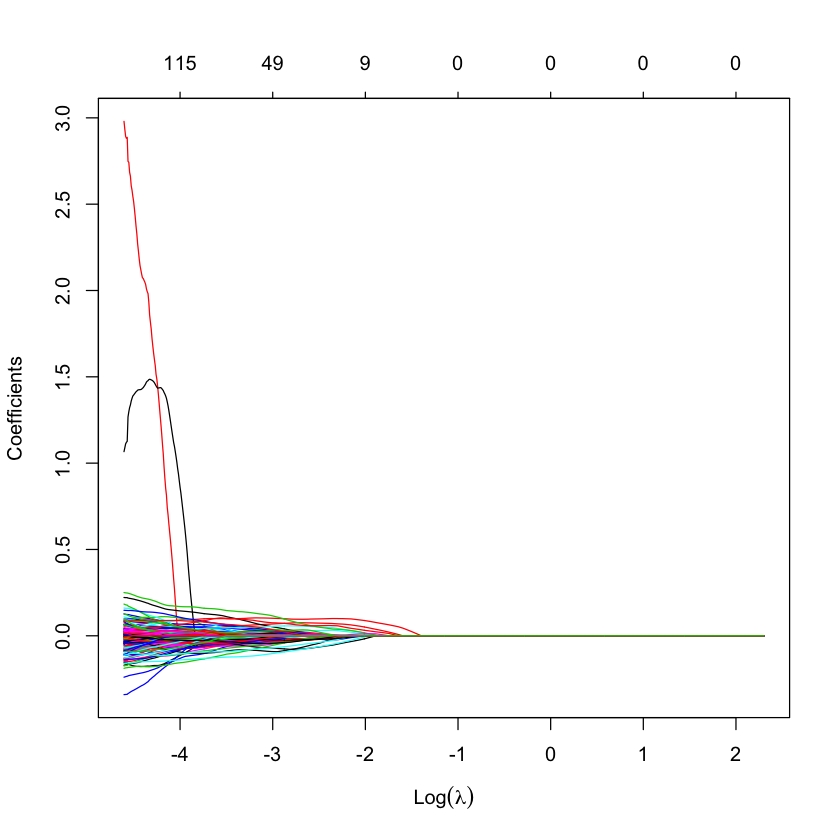

In [156]:
#L1 Regularization

library(glmnet)

grid =10^seq(1, -2, length = 800)
x.train<-as.matrix(data.train.x)
x.test<-as.matrix(data.test.x)

lasso.mod <- glmnet(x.train, data.train.y, alpha = 1, lambda = grid)
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

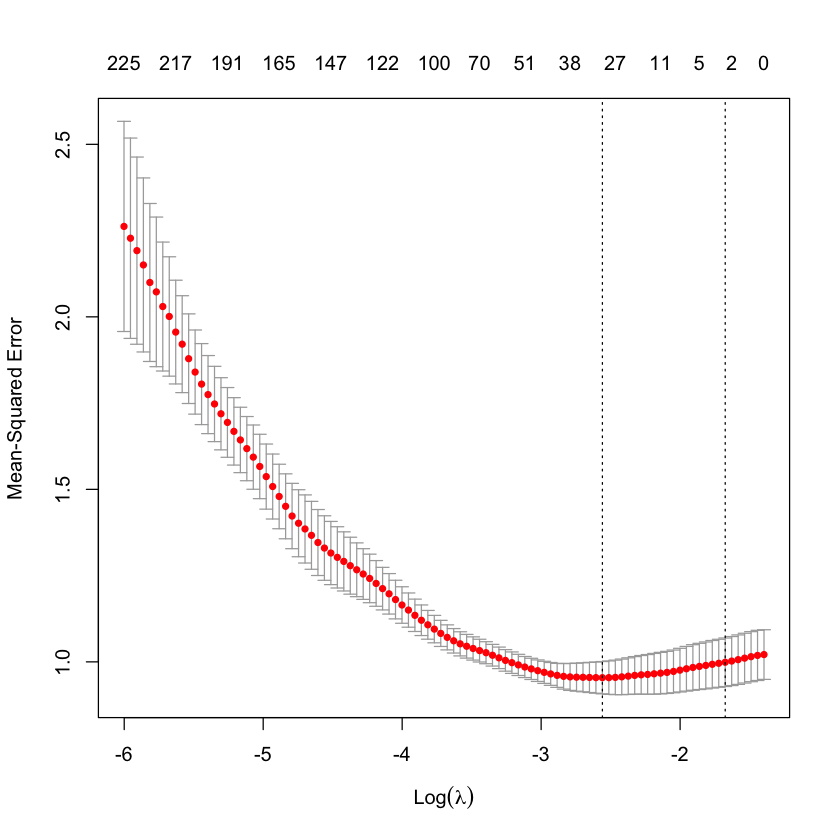

In [144]:
cv.lasso <- cv.glmnet(x.train, data.train.y, alpha = 1, nfold = 5)
plot(cv.lasso)

In [154]:
best.lasso <- glmnet(x.train, data.train.y, alpha = 1, lambda = cv.lasso$lambda.min)
bestlam = cv.lasso$lambda.min
length(colnames(data.train[, (which(abs(coef(best.lasso))>0))]))
lasso_pred1=predict(lasso.mod, s=bestlam, newx = x.train)
lasso_pred = predict(lasso.mod, s = bestlam, newx = x.test)
mean((lasso_pred1- data.train.y)^2)
mean((lasso_pred-data.test.y)^2)



[1] 29

[1] 0.8005791

[1] 0.8823456

--> Lasso regularization keep 29 predictor amoung the 837 of the data.train.x , the huge reduction of predictor clearly 
explaine the bad predictions of our models. However, it is the best submodel we find for linear model for now.

**INTERPRETATION :**


The resitual standard error is a little bit smaller than with multilinear regression on submodels, but is still quite high. 

In [25]:
#LASSO L2-REGULARIZATION 

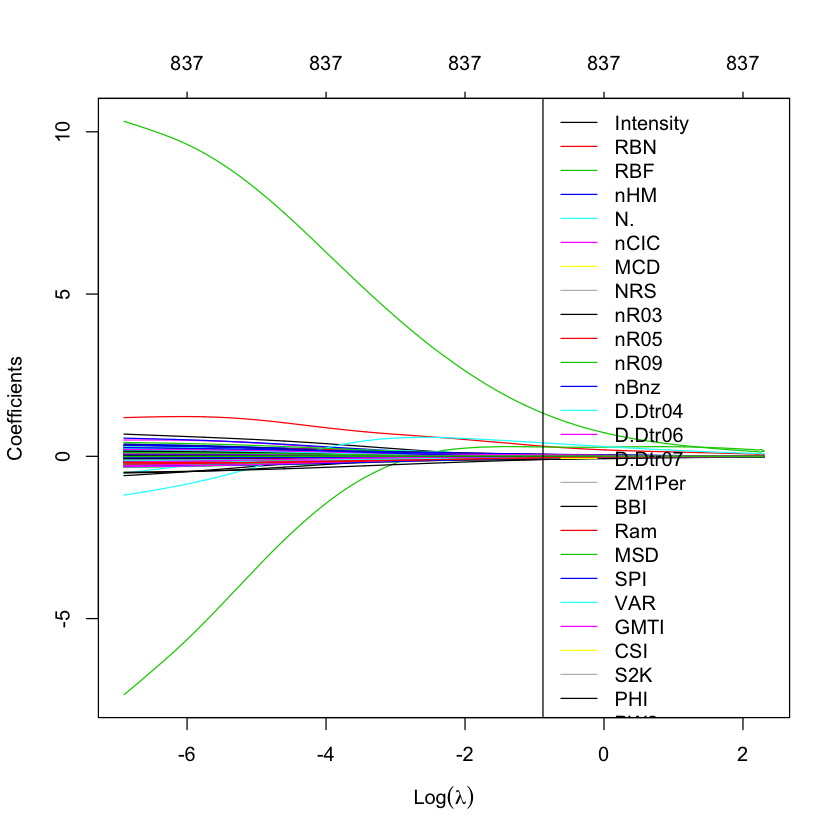

In [158]:
ridge.mod <- glmnet(x.train, data.train.y, alpha = 0, lambda = 10^seq(1, -3, length = 800))
plot(ridge.mod, "lambda", xlab = parse(text = "Log(lambda)"))
labs = names(ridge.mod$beta[,1]) # extract labels
legend('topright', legend=labs, col=1:length(labs), lty=1) # show legend with labels

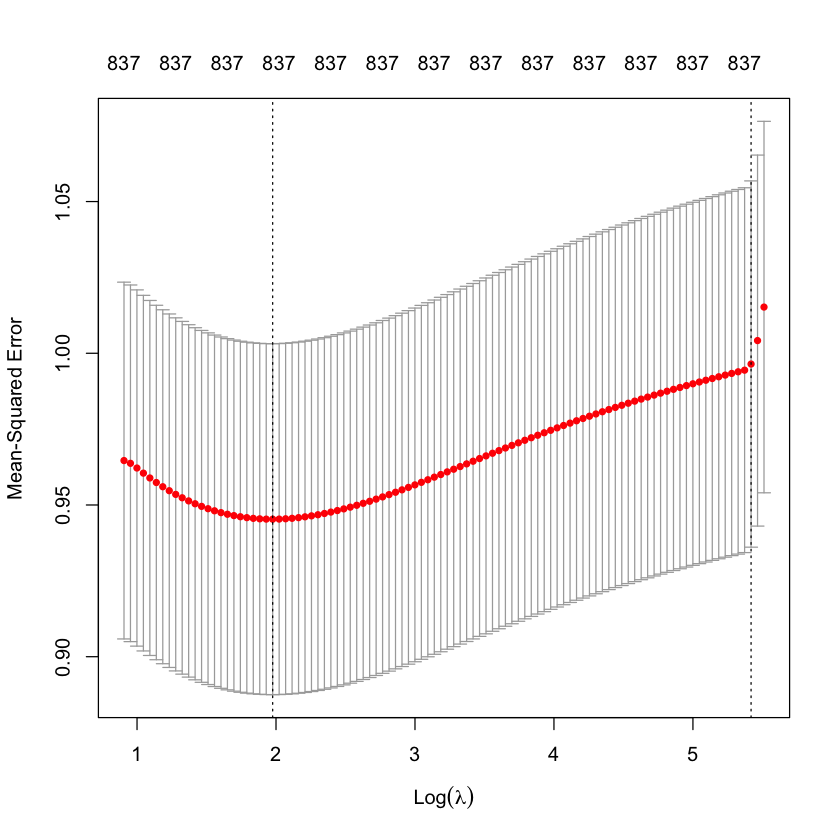

In [159]:
cv.lasso2 <- cv.glmnet(x.train, data.train.y,  alpha = 0, nfold = 50)
plot(cv.lasso2)


In [160]:
bestlam2 = cv.lasso2$lambda.min
best.lasso.1se <- glmnet(x.train, data.train.y, alpha = 0, lambda = bestlam2)


In [161]:
ridge_pred1 = predict(ridge.mod,  s = bestlam, newx = x.train)
ridge_pred = predict(ridge.mod,  s = bestlam, newx = x.test)
mean((ridge_pred1-data.train.y)^2)
mean((ridge_pred-data.test.y)^2)


[1] 0.3377739

[1] 52.91591

The MSE of the training set is much lower than the one found with L1-regularization. However, the MSE of the test set is a higher. 
We probably suppress to muche information from the predictor. let's try PCA in order to get around dimensionality issue.

Let's perfom PCA on data.train :

In [163]:
prin_comp <- prcomp(data.train.x, scale. = T, center =T)
summary(prin_comp)


Importance of components:
                           PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     13.4925 9.7988 7.98536 6.38519 5.54282 5.04563 4.64641
Proportion of Variance  0.2175 0.1147 0.07618 0.04871 0.03671 0.03042 0.02579
Cumulative Proportion   0.2175 0.3322 0.40840 0.45711 0.49382 0.52423 0.55002
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.31932 4.30791 4.11669 3.83024 3.58738 3.44943 3.40670
Proportion of Variance 0.02229 0.02217 0.02025 0.01753 0.01538 0.01422 0.01387
Cumulative Proportion  0.57231 0.59449 0.61473 0.63226 0.64764 0.66185 0.67572
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     3.23721 3.17464 3.05590 2.89649 2.84735 2.70679 2.65238
Proportion of Variance 0.01252 0.01204 0.01116 0.01002 0.00969 0.00875 0.00841
Cumulative Proportion  0.68824 0.70028 0.71144 0.72146 0.73115 0.73990 0.74831
                          PC22

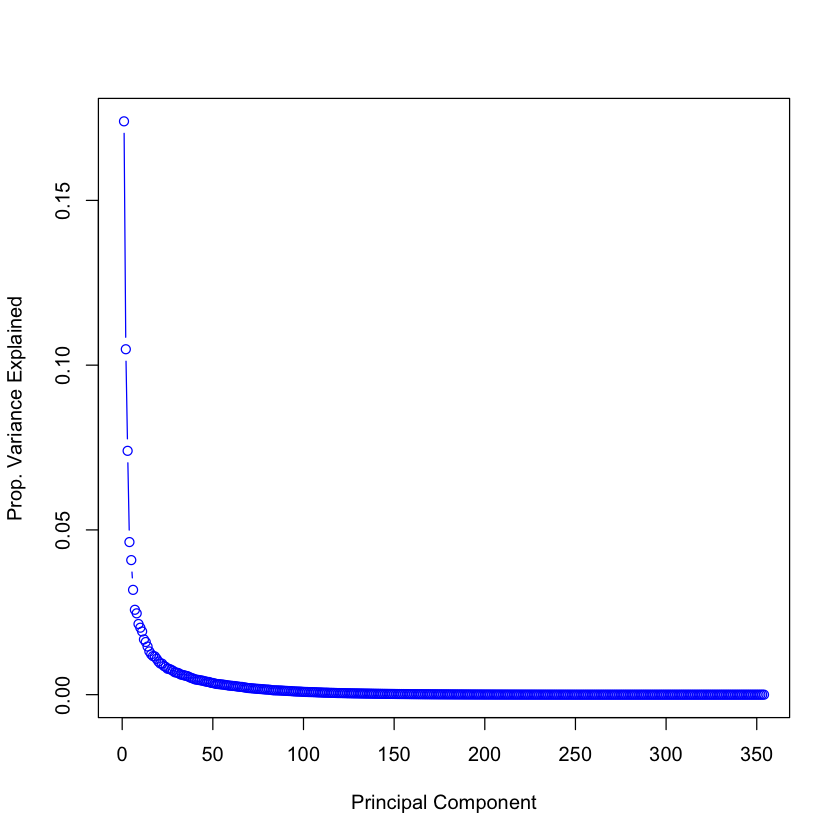

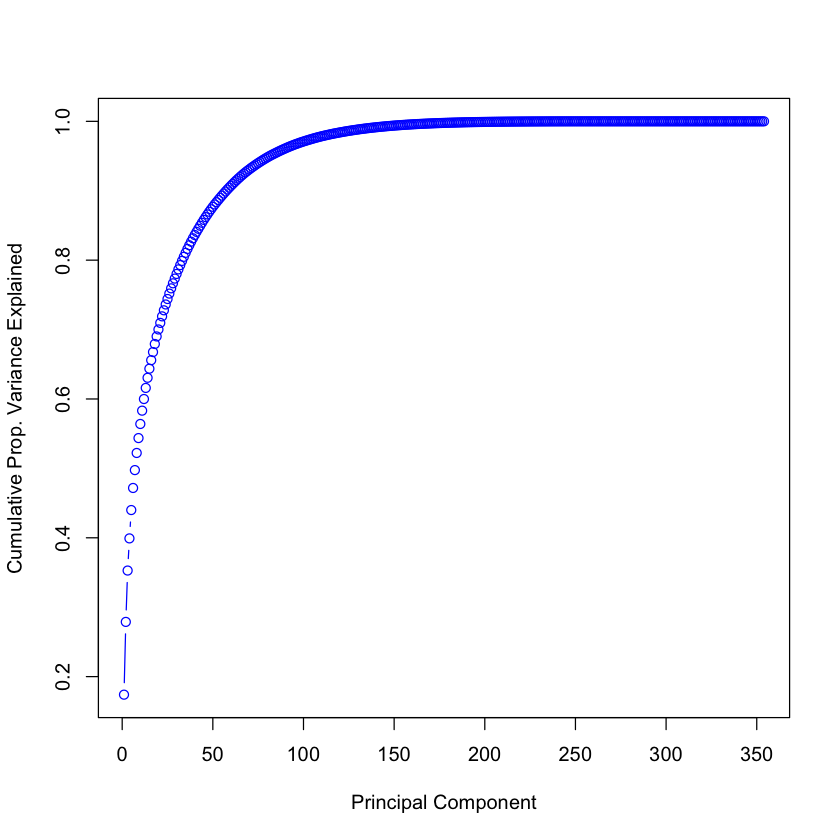

In [82]:
pca.var <- prin_comp$sdev^2
pca.vare <- pca.var / sum(pca.var)
plot(pca.vare, xlab = "Principal Component", ylab = "Prop. Variance Explained", col = "blue", type = "b")
plot(cumsum(pca.vare), xlab = "Principal Component", ylab = "Cumulative Prop. Variance Explained", col = "blue", type = "b")

In [98]:
(which(cumsum(pca.vare)>0.8))[1]

[1] 34

--> prenons les 34 premiers componentes qui suffisent a epxliquer 80% de la variance .

In [164]:
#add a training set with principal components
train.data <- data.frame(pleasantness = data.train.y, prin_comp$x)

#we are interested in first 34 PCAs

train.data <- train.data[,1:34]


linearmod<-lm(pleasantness ~ .-1, train.data)
summary(linearmod)
#transform test into PCA

test.data <- predict(prin_comp, data.test)
test.data <- data.frame(pleasantness = data.test.y, test.data)


#select the first 60 components
test.data <- test.data[,1:34]


rpart.prediction <- predict(linearmod, test.data)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data$pleasantness - predict(fit, data))^2)
    TSS <- sum((data$pleasantness- mean(data$pleasantness))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}

quality.of.fit(linearmod, train.data)
quality.of.fit(linearmod, test.data)


#training error  : 
1/length(train.data$pleasantness) * sum((train.data$pleasantness-rpart.prediction )^2)





Call:
lm(formula = pleasantness ~ . - 1, data = train.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2267 -0.6349  0.0739  0.5343  2.1877 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)   
PC1  -0.0076667  0.0037412  -2.049  0.04125 * 
PC2  -0.0125053  0.0051515  -2.427  0.01575 * 
PC3   0.0008601  0.0063214   0.136  0.89186   
PC4   0.0073781  0.0079056   0.933  0.35138   
PC5  -0.0141392  0.0091070  -1.553  0.12151   
PC6   0.0101726  0.0100044   1.017  0.31001   
PC7   0.0025277  0.0108640   0.233  0.81617   
PC8  -0.0211189  0.0116867  -1.807  0.07169 . 
PC9  -0.0077089  0.0117177  -0.658  0.51108   
PC10  0.0244776  0.0122619   1.996  0.04675 * 
PC11  0.0232545  0.0131790   1.765  0.07860 . 
PC12 -0.0077999  0.0140712  -0.554  0.57975   
PC13  0.0202270  0.0146339   1.382  0.16787   
PC14 -0.0259794  0.0148175  -1.753  0.08051 . 
PC15  0.0026565  0.0155933   0.170  0.86483   
PC16 -0.0292487  0.0159006  -1.839  0.06677 . 
PC17 -0.0296302  0.0165184  -1.

Residual standard error:  0.948407095282745  R^2 =  0.189702193443666 
Residual standard error:  2.83286317449827  R^2 =  -6.35055570395723 


[1] 7.803501

Lasso L1 regularization gives us the best result. 

Overall, the MSE of the linear methods we tested is very high.Those methods do not predict the pleasantness efficiently. 

* III : NON LINEAR METHOD (TREE)

In [7]:
library(caret)


data <- Data[, which(apply(Data, 2, var)!=0)] # supress columns with var == 0 

cormat<- cor(data)
highly_corr <- findCorrelation(cormat, 0.9) # find correlated columns 
data <- data[,-c(highly_corr)] # suppress correlated columns 
data_final<-data[, -3] # supress the SWEETORSOUR pedictor 
data_final<-as.data.frame(scale(data_final)) # normalization 


#creation train/test set

set.seed(1)

data.x<-(data_final[, -2])

data.y<-(data_final$VALENCE.PLEASANTNESS)
data<-cbind(data.y, data.x)

idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)
X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) ==0 # identify col with 0 variance 
data.train.x <- data.frame(X.train[, !idx.zero.var]) # supress the predictors with var == 0 


data.train.y<-data.y[idx.train]
data.train<-cbind(pleasantness=data.train.y, data.train.x)


X.test<- data.x[-idx.train, ]
data.test.x <- data.frame(X.test[, !idx.zero.var])  # supress the predictors with var == 0 in the train set 


data.test.y<-data.y[-idx.train]
data.test<-(cbind(pleasantness=data.test.y, data.test.x))



Perform descision tree on our data : 

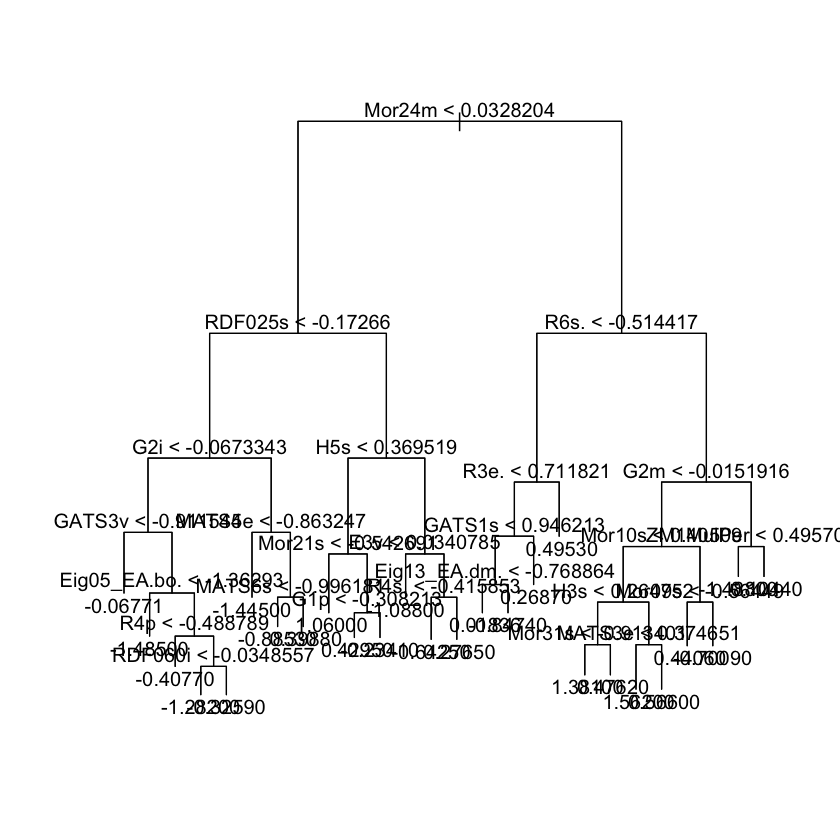

In [6]:
#DESCISION TREES 

library(tree)
p_tree <- tree(data.train$pleasantness ~ ., data.train, minsize = 1)
plot(p_tree)
text(p_tree)


In [7]:

mean((data.test[,'pleasantness']) - predict(p_tree, data.test))^2

[1] 0.0004339606

Use prunned tree to find the optimal size of tree to predict our data : 

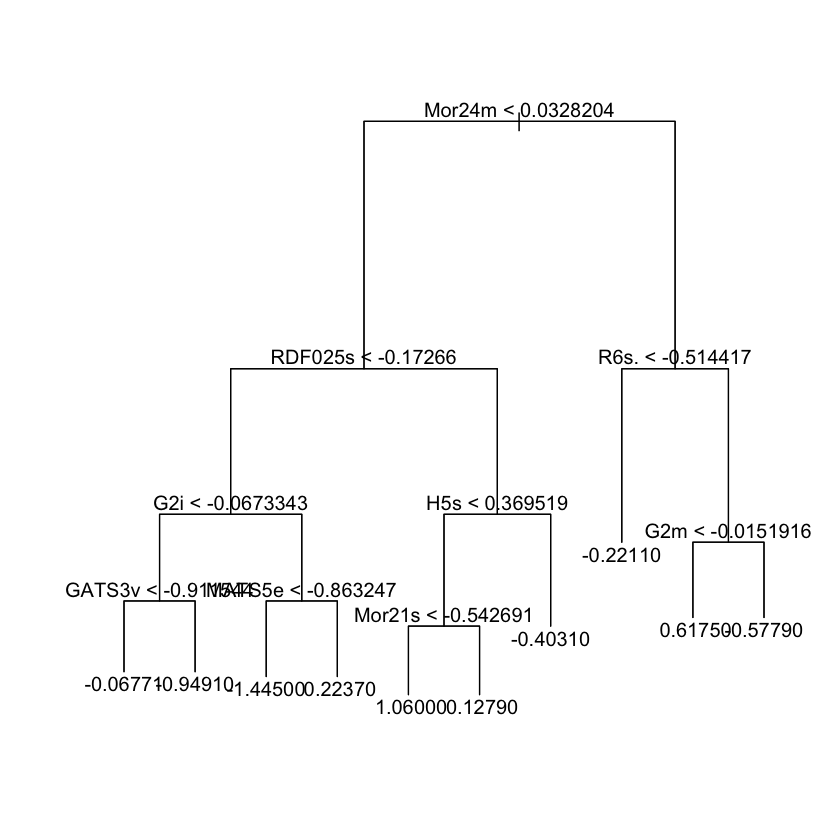

In [8]:
# prunned tree example of size 10 
prunned_p_tree <- prune.tree(p_tree, best = 10)
plot(prunned_p_tree)
text(prunned_p_tree)

In [9]:
dim(data)

mean((data.test[,'pleasantness']) - predict(prunned_p_tree, data.test))^2

[1] 708 852

[1] 0.0003288751

In the following we define some functions to fit the data and run 6-fold cross-validation. We run 6-fold cross-validation,
because our training data has size 426, which is a multiple of 6.

In [10]:
# find the optimal tree size
p.train <- function(train) {
    tree(data.y ~ ., data, subset = train)
}

p.evaluate <- function(tree, set) {
    sapply(2:100, function(i) mean((data[set,'data.y']) - predict(prune.tree(tree, best = i), data[set,]))^2) # We compute the mean squared error for all trees with 2 to 100 leaf nodes.
}
p.cv <- function(train) {
    res <- sapply(1:6, function(v) {
                            idx.test <- seq((v-1)*71 + 1, v*71) # fold index : divide into 6 cross-fold 
                            this.fold.test <- train[idx.test]   # validation
                            this.fold.train <- train[-idx.test] # training
                            tree <- p.train(this.fold.train)
                            p.evaluate(tree, this.fold.test)
                        })
    rowMeans(data.frame(res))
}
           
p.train.and.evaluate <- function() { # method to evaluate the model of training, test and using cross-validation
    train <- sample(nrow(data), 426)
    tree <- p.train(train)
    list(train = p.evaluate(tree, train),
         test = p.evaluate(tree, -train),
         cv = p.cv(train),
         tree = tree)
}
set.seed(1)
res <- replicate(3, p.train.and.evaluate())# we run everything for 3 different training sets
           


Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best

Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-lengt

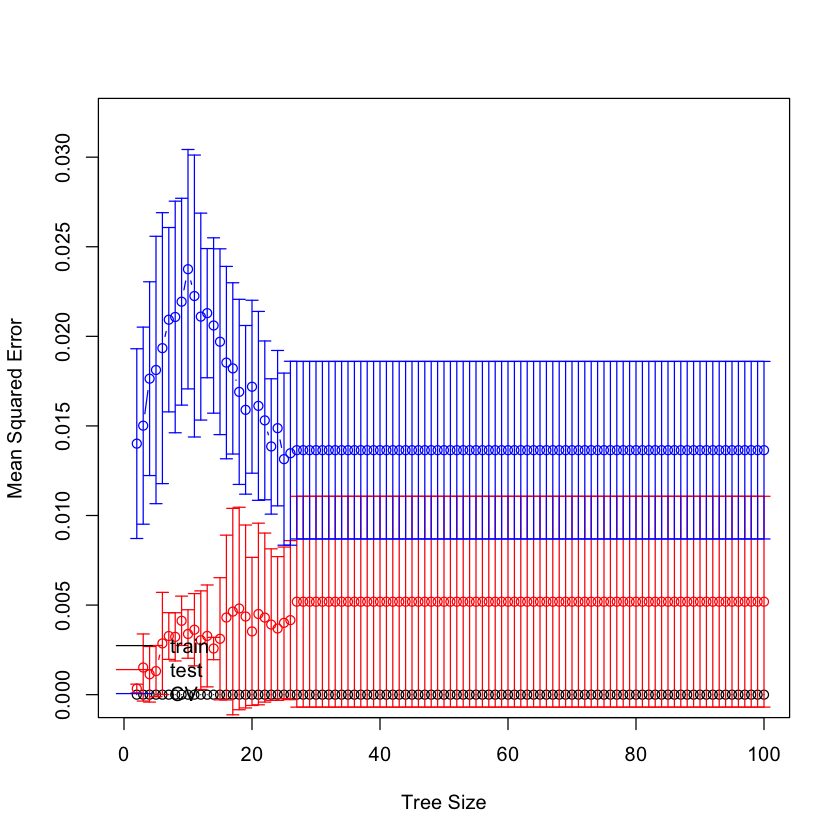

In [11]:

std.plot <- function(data, x = 2:100, ...) {
    df <- data.frame(data)
    m <- rowMeans(df)
    std <- sqrt(rowMeans((df - m)^2))
    points(x, m, type = "b", ...)
    arrows(x, m - std, x, m + std, length=0.05, angle = 90,  code=3, ...)
}
plot(c(),ylim = c(0,0.032), xlim = c(0, 100), xlab = "Tree Size", ylab = "Mean Squared Error")
std.plot(res[1,])
std.plot(res[2,], col = "red")
std.plot(res[3,], col = "blue")
legend("bottomleft", c("train", "test", "CV"), bty = 'n',
                     col = c("black", "red", "blue"), lty = 1)


We can deduce from the plot above that the optimal tree size is around 22.

lets plot this tree. 

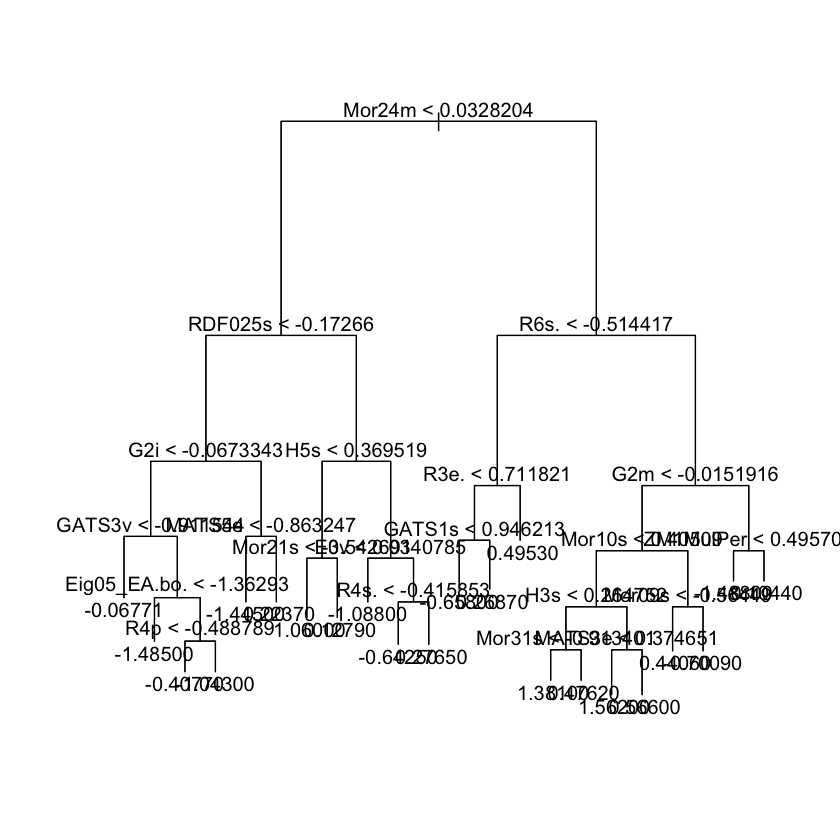

In [12]:
final.tree <- prune.tree(p_tree, best = 22)
plot(final.tree)
text(final.tree)


In [13]:
# Mean MSE for training set 
df <- data.frame(res[1,])
m <- rowMeans(df)
mean(m)

# Mean MSE for test set 
df <- data.frame(res[2,])
m <- rowMeans(df)
mean(m)

# Mean MSE for CV set 
df <- data.frame(res[3,])
m <- rowMeans(df)
mean(m)

[1] 8.943414e-34

[1] 0.004717113

[1] 0.01474789

The MSE found for training set is very low. The one for the test set is low but a lot hight than the MSe for training set. This method is maybe still a little bit too flexible. The MSE for tge cross validation set is the highest. However, regarding those MSE values, this method is quite efficient to predict valence pleasantness. 

In [ ]:
#Bangging and random forest

In [8]:
library(xgboost)
library(Matrix)
plea.train.x <- sparse.model.matrix( pleasantness~ . -1, data = data.train)
plea.test.x = sparse.model.matrix(pleasantness ~ . -1, data = data.test)
plea.train.y =data.train.y
plea.test.y =data.test.y

In [9]:
#Random forst
#By default, randomForest() uses p/3 variables when building a random forest of regression trees
library(randomForest)
set.seed(1)

m <- 844 
bag.pleas <- randomForest(pleasantness ~ ., data = data.train, mtry = m/3, ntree = 1000)
bag.pleas
pred.bag_test <- predict(bag.pleas, newdata = data.test)
pred.bag_train<-predict(bag.pleas, newdata = data.train)
mean((pred.bag_train - data.train.y)^2)
mean((pred.bag_test - data.test.y)^2)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = pleasantness ~ ., data = data.train, mtry = m/3,      ntree = 1000) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 281

          Mean of squared residuals: 0.9768487
                    % Var explained: 2.95

[1] 0.2223362

[1] 0.8903465

MSR is high and %Var explained is low

In [19]:

importance(bag.pleas)
which.max (importance(bag.pleas))
             



,IncNodePurity
Intensity,1.109814e+01
Mi,2.521474e-01
RBF,3.065847e-01
nDB,1.614308e-01
nHet,3.706290e-02
O.,3.485523e-01
nCIR,1.660812e-02
RFD,1.245782e-02
NNRS,4.124744e-02
nR04,3.008346e-03


[1] 1

in this model Intensity determine the Pleasantness, 
However, the test error is high as the Mean squared error for our model.
--> Pruned tree gives best predictions.

In [ ]:
#testons pour des valeur differentes de eta pour boosting. 

In [25]:
set.seed(1)
pows <- seq(-3.5, -0.2, by = 0.1)
lambdas <- 10^pows
lambdas
for (i in 1:length(lambdas)) {
  boost.pleas <- xgboost(plea.train.x,
                           label=plea.train.y,
                           eta=lambdas[i],
                           objective="reg:squarederror",
                           max.depth=3,
                           nrounds=1000,
                           verbose = 0)
  pred.train <- predict(boost.pleas, plea.train.x)
  pred.test <- predict(boost.pleas, plea.test.x)
  train.err[i] <- mean((pred.train - plea.train.y)^2)
  test.err[i] <- mean((pred.test - plea.test.y)^2)
}
plot(log(lambdas), log(train.err), type="b", xlab="log Shrinkage values", ylab="log Training MSE")

[1] 0.0003162278 0.0003981072 0.0005011872 0.0006309573 0.0007943282
 [6] 0.0010000000 0.0012589254 0.0015848932 0.0019952623 0.0025118864
[11] 0.0031622777 0.0039810717 0.0050118723 0.0063095734 0.0079432823
[16] 0.0100000000 0.0125892541 0.0158489319 0.0199526231 0.0251188643
[21] 0.0316227766 0.0398107171 0.0501187234 0.0630957344 0.0794328235
[26] 0.1000000000 0.1258925412 0.1584893192 0.1995262315 0.2511886432
[31] 0.3162277660 0.3981071706 0.5011872336 0.6309573445

ERROR: Error in eval(expr, envir, enclos): objet 'train.err' introuvable


In [ ]:
min(train.err)
lambdas[which.min(train.err)]

--> optimal shrinkage for data train is  λ≈0.5 and give us 

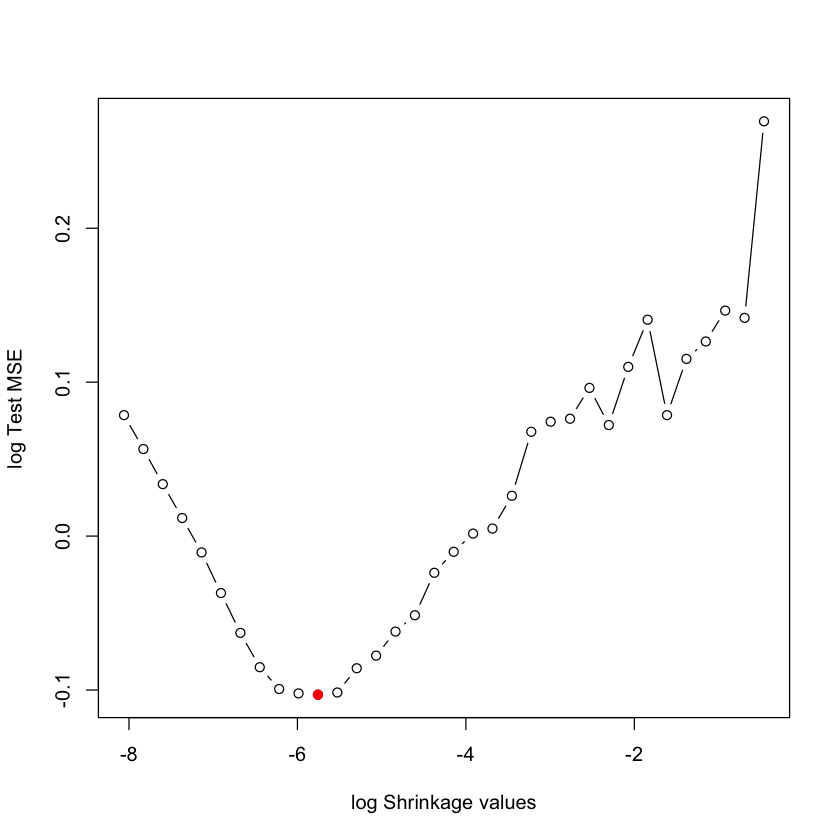

In [20]:
plot(log(lambdas), log(test.err), type="b", xlab="log Shrinkage values", ylab="log Test MSE")
points(log(lambdas[which.min(test.err)]), log(min(test.err)), col="red", pch=19)

In [21]:
min(test.err)
lambdas[which.min(test.err)]

[1] 0.9021147

[1] 0.003162278

-->  The optimal shrinkage is  λ≈0.003

In [22]:
boost.pleas = xgboost(plea.train.x, label = plea.train.y,
                      objective = "reg:linear",
                      eta = 0.003,
                      max_depth = 4,
                      nround = 10000)

[1]	train-rmse:1.126945 
[2]	train-rmse:1.125067 
[3]	train-rmse:1.123196 
[4]	train-rmse:1.121333 
[5]	train-rmse:1.119478 
[6]	train-rmse:1.117629 
[7]	train-rmse:1.115789 
[8]	train-rmse:1.113941 
[9]	train-rmse:1.112115 
[10]	train-rmse:1.110296 
[11]	train-rmse:1.108484 
[12]	train-rmse:1.106665 
[13]	train-rmse:1.104866 
[14]	train-rmse:1.103076 
[15]	train-rmse:1.101292 
[16]	train-rmse:1.099500 
[17]	train-rmse:1.097729 
[18]	train-rmse:1.095965 
[19]	train-rmse:1.094208 
[20]	train-rmse:1.092458 
[21]	train-rmse:1.090714 
[22]	train-rmse:1.088962 
[23]	train-rmse:1.087232 
[24]	train-rmse:1.085508 
[25]	train-rmse:1.083775 
[26]	train-rmse:1.082065 
[27]	train-rmse:1.080364 
[28]	train-rmse:1.078666 
[29]	train-rmse:1.076975 
[30]	train-rmse:1.075294 
[31]	train-rmse:1.073599 
[32]	train-rmse:1.071929 
[33]	train-rmse:1.070264 
[34]	train-rmse:1.068607 
[35]	train-rmse:1.066962 
[36]	train-rmse:1.065323 
[37]	train-rmse:1.063666 
[38]	train-rmse:1.062040 
[39]	train-rmse:1.060

In [23]:
yhat.boost = predict(boost.pleas, plea.test.x)
(mean(yhat.boost -  plea.test.y)^2)



[1] 6.097654e-05

In [ ]:
xgb.plot.importance(xgb.importance(model = boost.pleas))
xgb.importance(model = boost.pleas)[, 1]

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




[1] 0.8916383

--> error is larger than the one with boosting : bossting give us the best model. 